In [1]:
import warnings
warnings.filterwarnings("ignore")

I will be answering all the modeling questions along with :

Split the data into training and test times series (test starting at observation 700, use function window)

fit an Arima model, manually and with Auto-Arima on the training part
forecast the next 25 observation and plot the original ts and the forecasted one.
What do you observe?

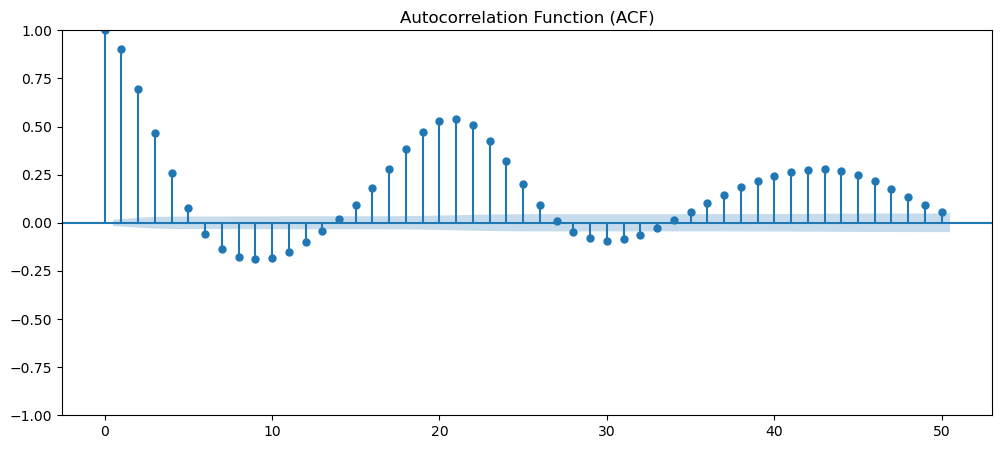

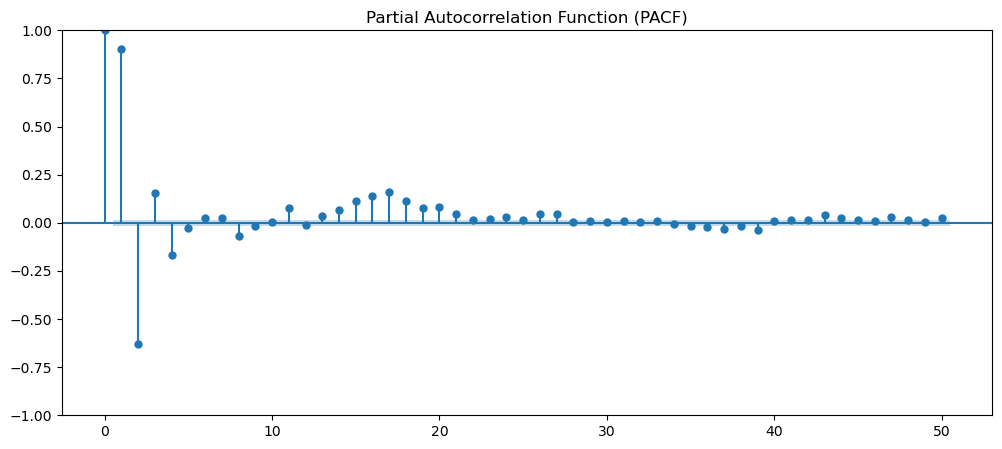

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('hour_pre.csv')

series = df['total_count_smoothed_kalman']

plt.figure(figsize=(12,5))
plot_acf(series, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(series, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


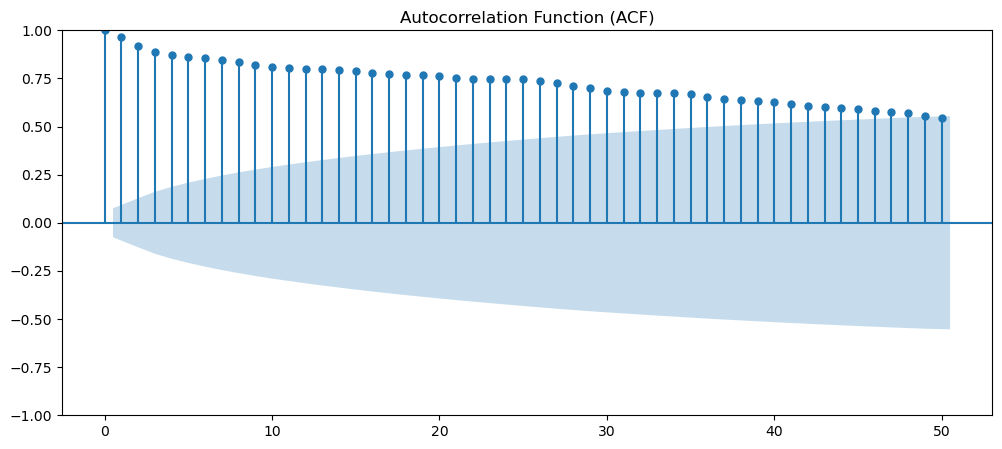

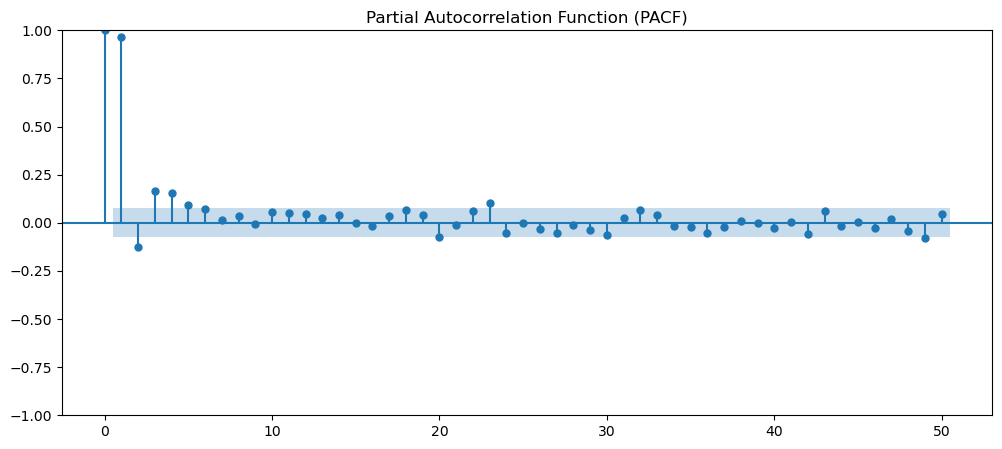

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('day-pre.csv')

series = df['total_count_smoothed_kalman']

plt.figure(figsize=(12,5))
plot_acf(series, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(series, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Timeseries is showing caracteristics of the moving average.ACF is showing sign function decay for both datasets

PACF Plot: The PACF plot is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. The ‘p’ parameter of the ARIMA model refers to the number of lagged observations in the model. In the PACF plot, look at the point where the plot crosses the upper confidence interval for the first time. This point can be a good initial estimate for ‘p’.

ACF Plot: The ACF plot is a measure of the correlation between the time series and the lagged version of itself. The ‘q’ parameter of the ARIMA model refers to the number of lagged forecast errors in the prediction equation. In the ACF plot, look at the point where the plot crosses the upper confidence interval for the first time. This point can be a good initial estimate for ‘q’.

In [4]:
## this is just a python test, i will switch to R after this since it is more suitable to answer teacher's questions

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

size = int(len(series) * 0.8)
train, test = series[0:size], series[size:len(series)]

model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

rmse = sqrt(mean_squared_error(test, predictions))
normalized_rmse = rmse / (np.max(test) - np.min(test))

print('Normalized RMSE: %.3f' % normalized_rmse)

Normalized RMSE: 0.293


ARIMA models work best with stationary data. but our data is not stationnary.
Determine ARIMA Model Parameters (p, d, q):

p is the order of the AutoRegressive part of the model. You can find the best value by inspecting the Partial Autocorrelation Plot.
d is the order of differencing required to make the time series stationary. If the time series is already stationary, d will be 0.
q is the order of the Moving Average part of the model. You can find the best value by inspecting the Autocorrelation Plot.

# R

In [2]:
library(forecast)
library(tseries)

# jjust loading my data in R
hour_data <- read.csv("hour_pre.csv", stringsAsFactors = FALSE)
day_data <- read.csv("day-pre.csv", stringsAsFactors = FALSE)


Warning message:
"package 'forecast' was built under R version 4.3.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'tseries' was built under R version 4.3.2"


In [3]:
hour_data$datetime <- as.POSIXct(paste(hour_data$date, hour_data$hour, ":00:00"), format="%Y-%m-%d %H:%M:%S")


hour_ts <- ts(hour_data$total_count_smoothed_kalman, frequency=24, start=c(hour_data$year[1], hour_data$month[1], hour_data$day[1], hour_data$hour[1]))


In [4]:
day_data$datetime <- as.Date(day_data$date, format="%Y-%m-%d")

day_data$year <- as.numeric(day_data$year)
day_data$date <- as.Date(day_data$date, format="%Y-%m-%d")

start_year <- day_data$year[1]
start_yday <- as.numeric(format(min(day_data$date), "%j"))  

day_ts <- ts(day_data$total_count_smoothed_kalman, frequency=365, start=c(start_year, start_yday))


Could you model the smoothed time series using ARIMA model:
- What are the candidate model
- Choose your model and justify your choice


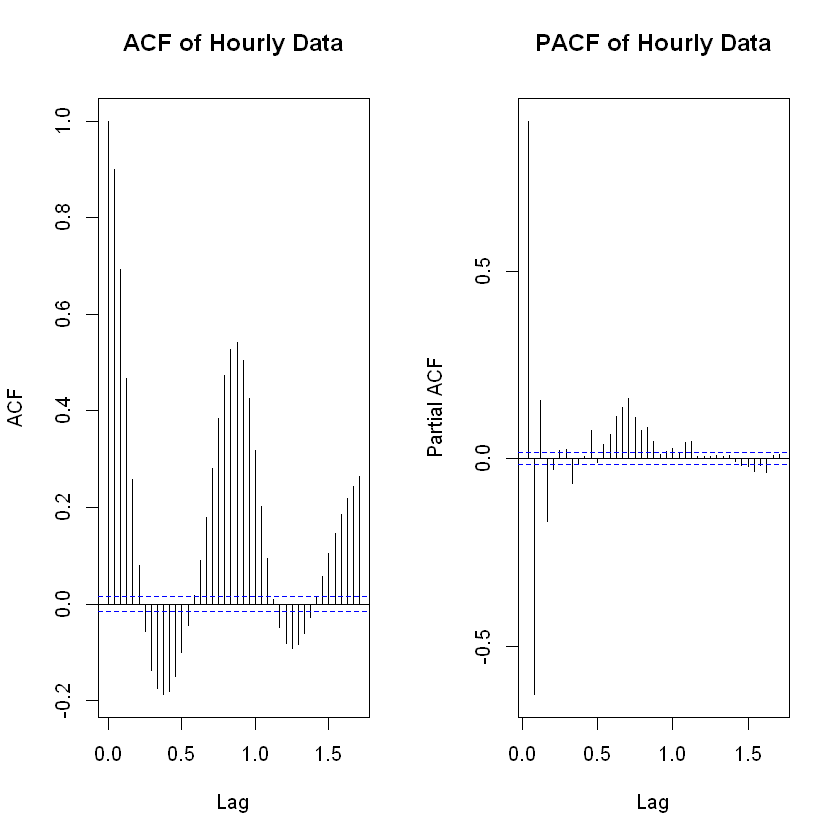

In [5]:
# Plot ACF and PACF
par(mfrow=c(1,2)) # Set up the graphics to show two plots side-by-side
acf(hour_ts, main="ACF of Hourly Data")
pacf(hour_ts, main="PACF of Hourly Data")


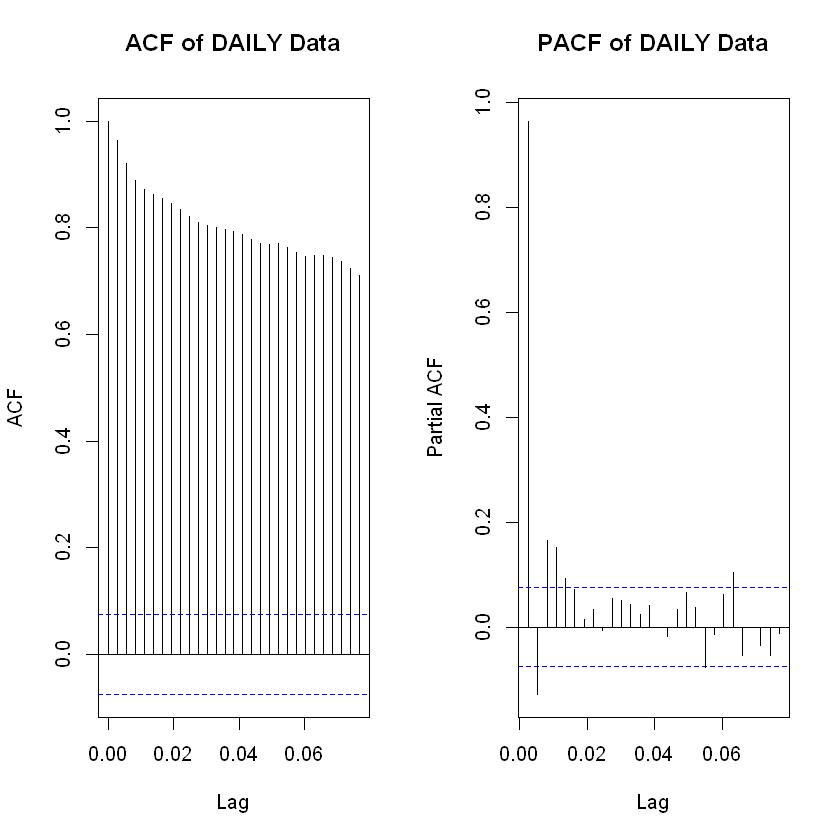

In [6]:
# Plot ACF and PACF
par(mfrow=c(1,2)) # Set up the graphics to show two plots side-by-side
acf(day_ts, main="ACF of DAILY Data")
pacf(day_ts, main="PACF of DAILY Data")


In [7]:
#if the ACF shows exponential decay and the PACF cuts off after a specific lag, it suggests an AR(p) model.
#If the series is not stationary, you will need to difference it (the 'I' in ARIMA stands for Integrated, which refers to differencing the data to make it stationary).

Interpret the ACF Plot:
If the ACF plot shows a slow decay, this may indicate the need for differencing to achieve stationarity.
A sharp cut-off after a few lags in the ACF suggests a possible MA component. The lag at which the ACF cuts off is often the q value in the ARIMA model.

Interpret the PACF Plot:
Similar to the ACF, a slow decay in the PACF may indicate the need for differencing.
A sharp cut-off after a few lags in the PACF suggests a possible AR component. The lag at which the PACF cuts off is often the p value in the ARIMA model.

Differencing:
If the original series is non-stationary, we need to difference it. The number of differencing (d) needed is usually determined by how many times we need to difference the data to achieve stationarity.

Candidate Models:
Based on the above interpretations, we could propose several candidate models. For instance, if the PACF cuts off after lag 2, and the ACF tails off, we might consider an AR(2) model. If the ACF cuts off after lag 2, consider an MA(2) model. If both exhibit a cut-off, an ARMA model with both components might be needed.

Model Selection with AIC and BIC:
We would fit several models with different p, d, and q values and then compare their AIC and BIC values. The model with the lowest AIC or BIC is generally preferred.

In [8]:
# Fit different ARIMA models
model1 <- arima(day_ts, order=c(1,0,0))
model2 <- arima(day_ts, order=c(0,0,1))
model3 <- arima(day_ts, order=c(1,0,1))

# Compare AIC and BIC values
aic_values <- c(AIC(model1), AIC(model2), AIC(model3))
bic_values <- c(BIC(model1), BIC(model2), BIC(model3))

# Find the model with the lowest AIC and BIC
min_aic_index <- which.min(aic_values)
min_bic_index <- which.min(bic_values)

best_aic_model <- get(paste0("model", min_aic_index))
best_bic_model <- get(paste0("model", min_bic_index))

# Output the best models based on AIC and BIC
best_aic_model
best_bic_model



Call:
arima(x = day_ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.9589  0.1986  4238.4540
s.e.  0.0115  0.0419   470.1306

sigma^2 estimated as 186897:  log likelihood = -5063.41,  aic = 10134.81


Call:
arima(x = day_ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.9589  0.1986  4238.4540
s.e.  0.0115  0.0419   470.1306

sigma^2 estimated as 186897:  log likelihood = -5063.41,  aic = 10134.81

In [9]:
# Load the necessary library
library(forecast)


auto_fit <- auto.arima(day_ts)

# Look at the summary of the fitted model
summary(auto_fit)


Series: day_ts 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.8793  -0.2973  -0.8142
s.e.  0.0552   0.0388   0.0484

sigma^2 = 172589:  log likelihood = -5026.29
AIC=10060.59   AICc=10060.64   BIC=10078.64

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 5.338066 414.2071 268.4307 -0.7662892 7.416988 0.1184884
                     ACF1
Training set 3.454846e-05

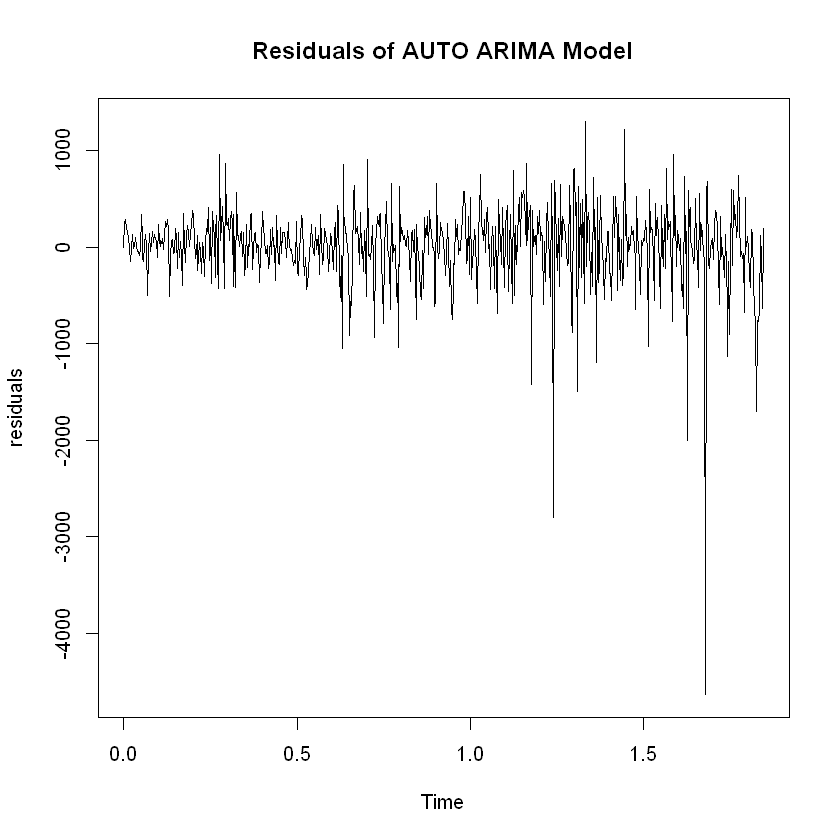

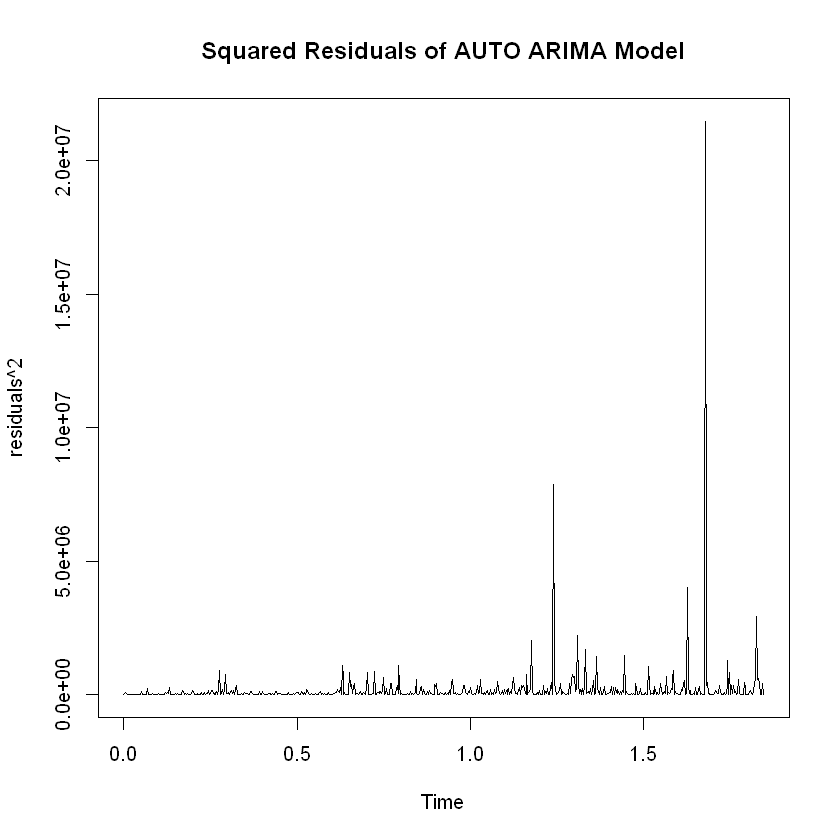

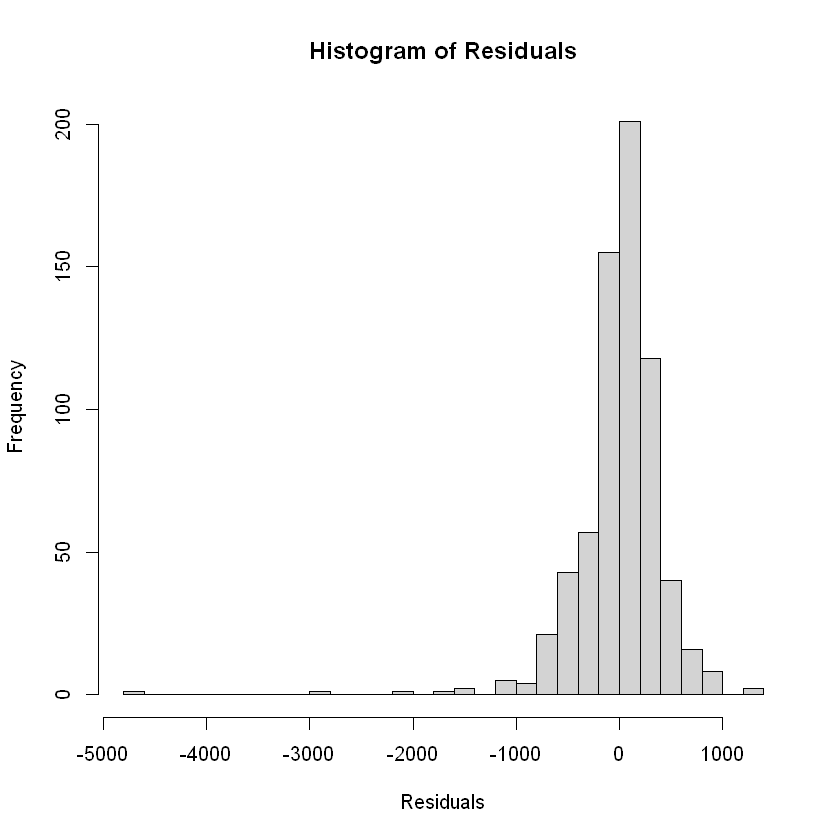

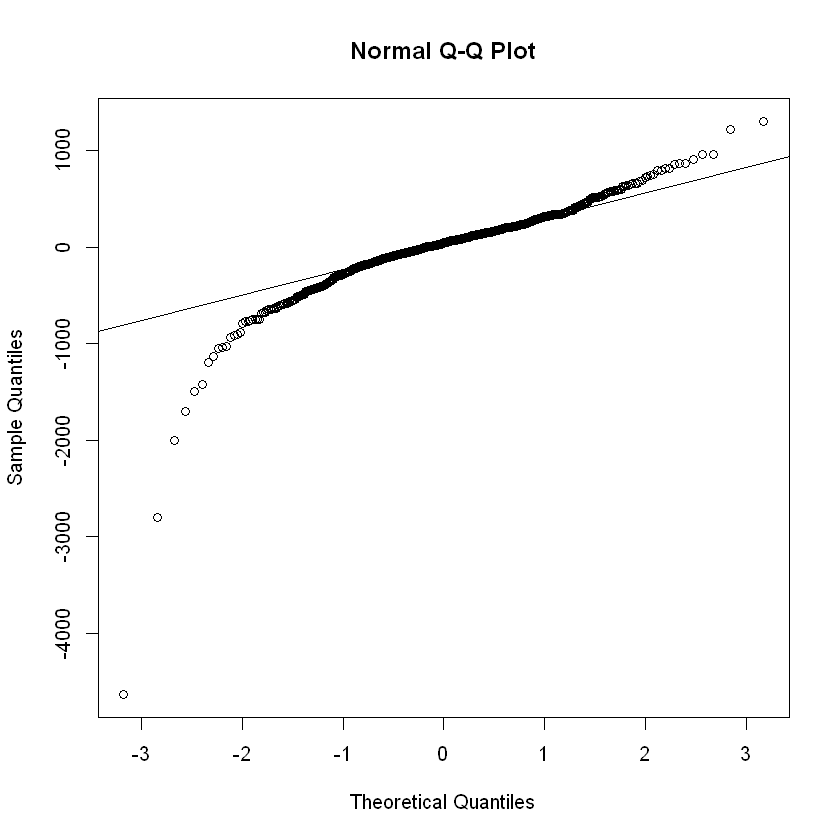

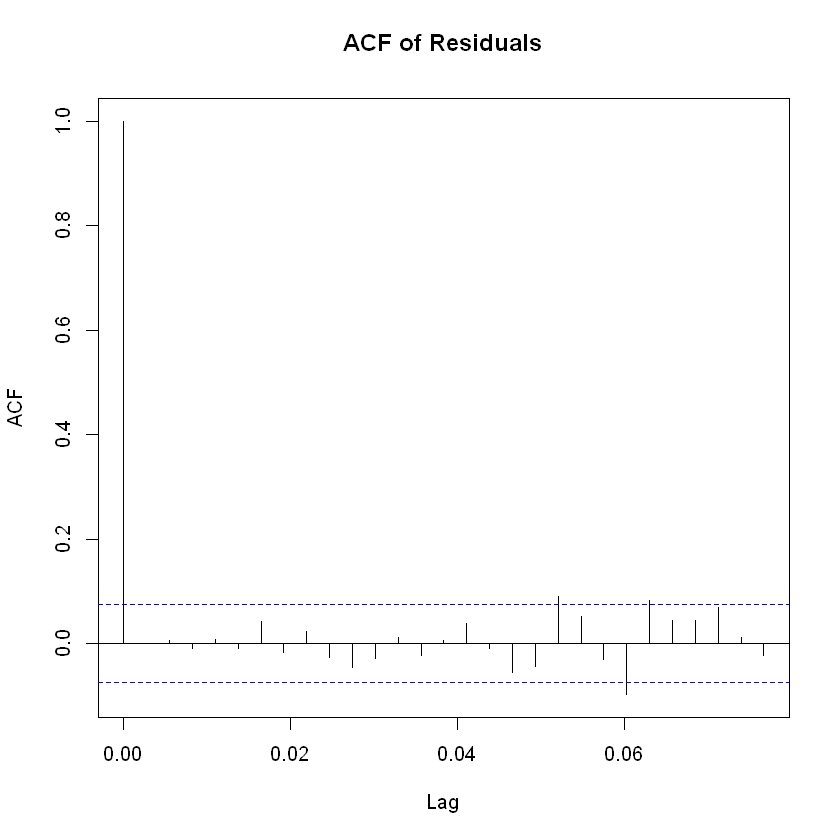


	Box-Ljung test

data:  residuals
X-squared = 1.4436, df = 6.5162, p-value = 0.976


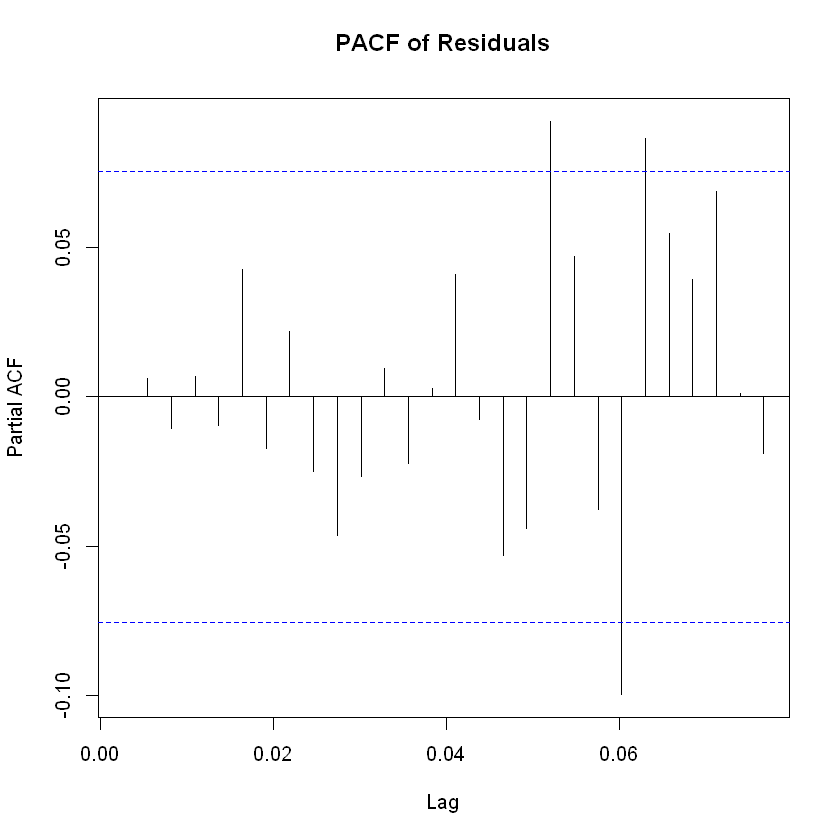

In [10]:
residuals <- residuals(auto_fit)

# Plot the residuals
plot(residuals, main="Residuals of AUTO ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of AUTO ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


Forecasting with ARIMA Models
Fit an ARIMA model on de-seasonal cnt (remove the season of cnt before fitting the model)

In [11]:
deseasonalized_day_ts <- diff(day_ts, lag = 12)


In [12]:
# Fit an ARIMA model to the deseasonalized data
# The order will be based on prior analysis (ACF, PACF), but here is an example:
arima_model_deseasonalized <- arima(deseasonalized_day_ts, order=c(1,0,1))
summary(arima_model_deseasonalized)



Call:
arima(x = deseasonalized_day_ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.7010  0.3102    13.1077
s.e.  0.0328  0.0409    96.4087

sigma^2 estimated as 323836:  log likelihood = -5155.17,  aic = 10318.35

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.9522508 569.0655 379.1182 91.04183 219.2036 0.9113541
                   ACF1
Training set 0.01455068

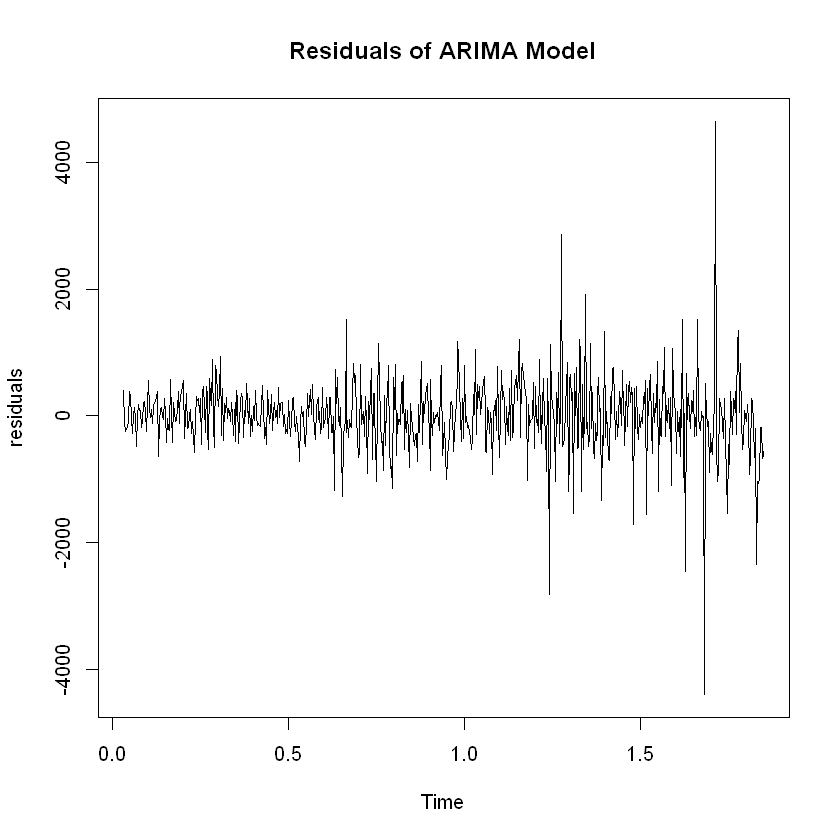

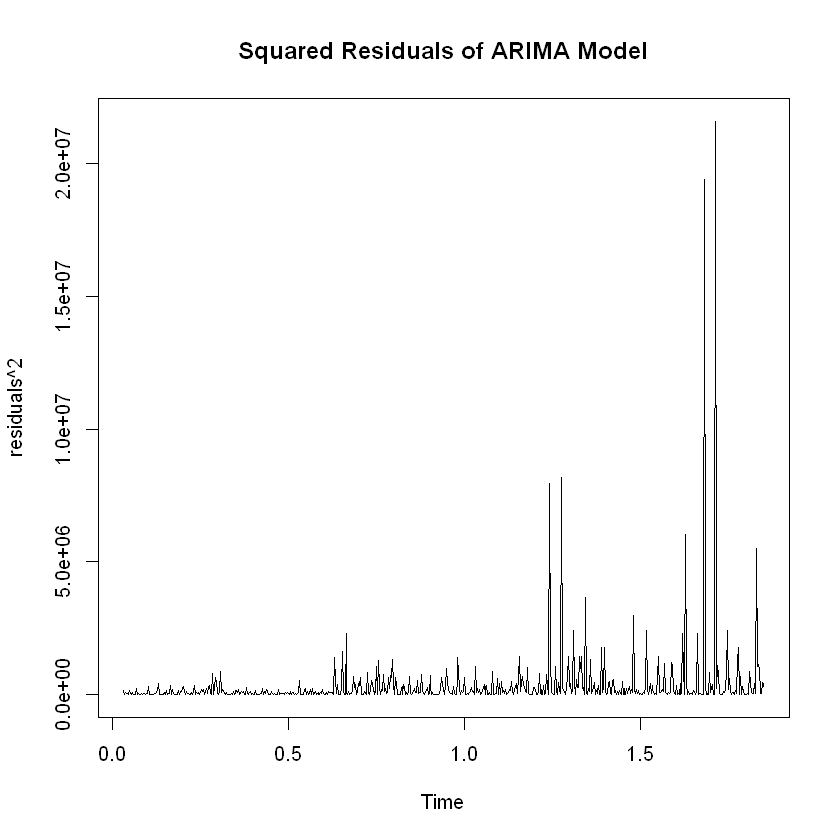

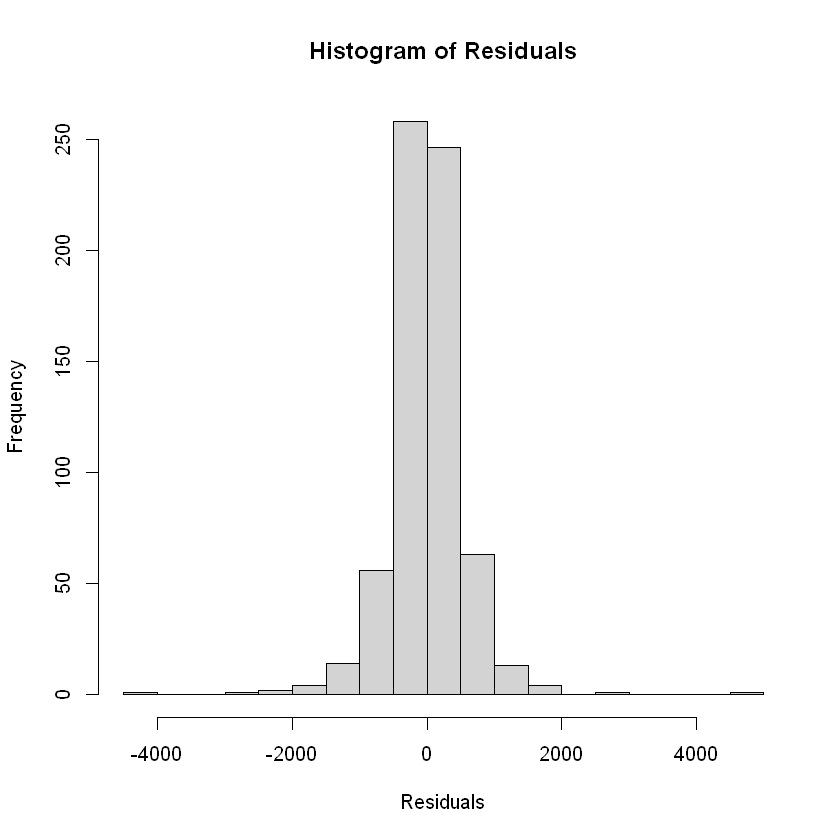

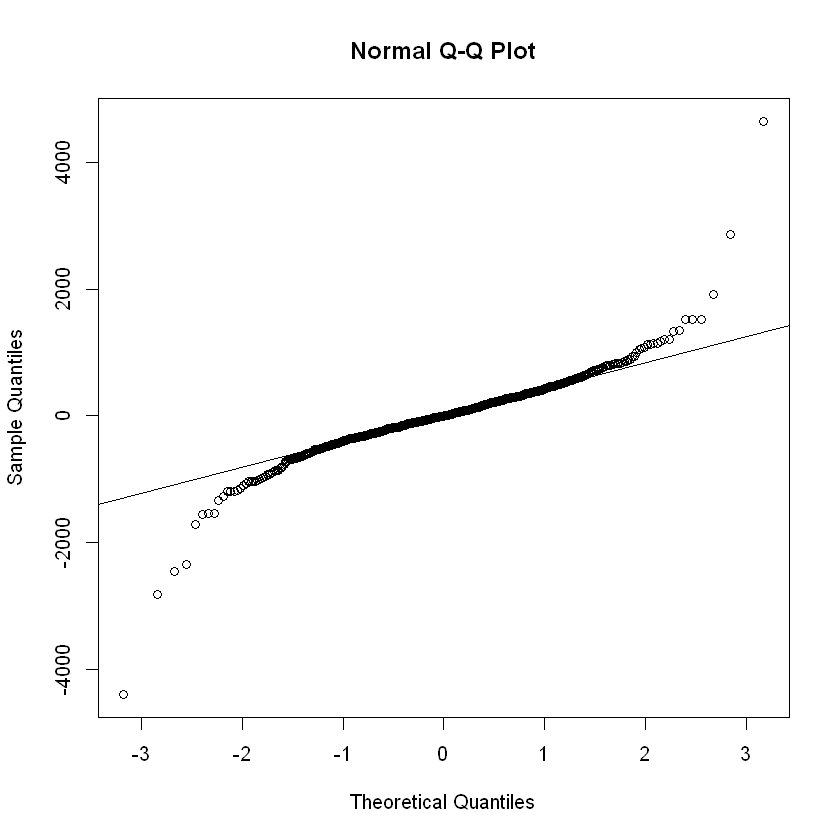

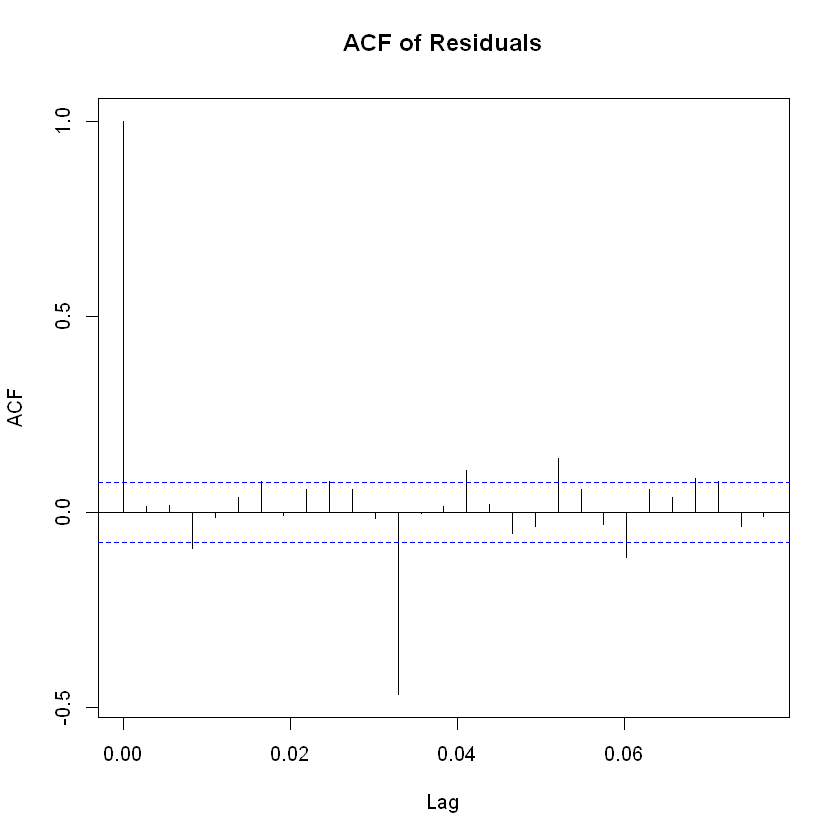


	Box-Ljung test

data:  residuals
X-squared = 11.354, df = 6.4983, p-value = 0.09928


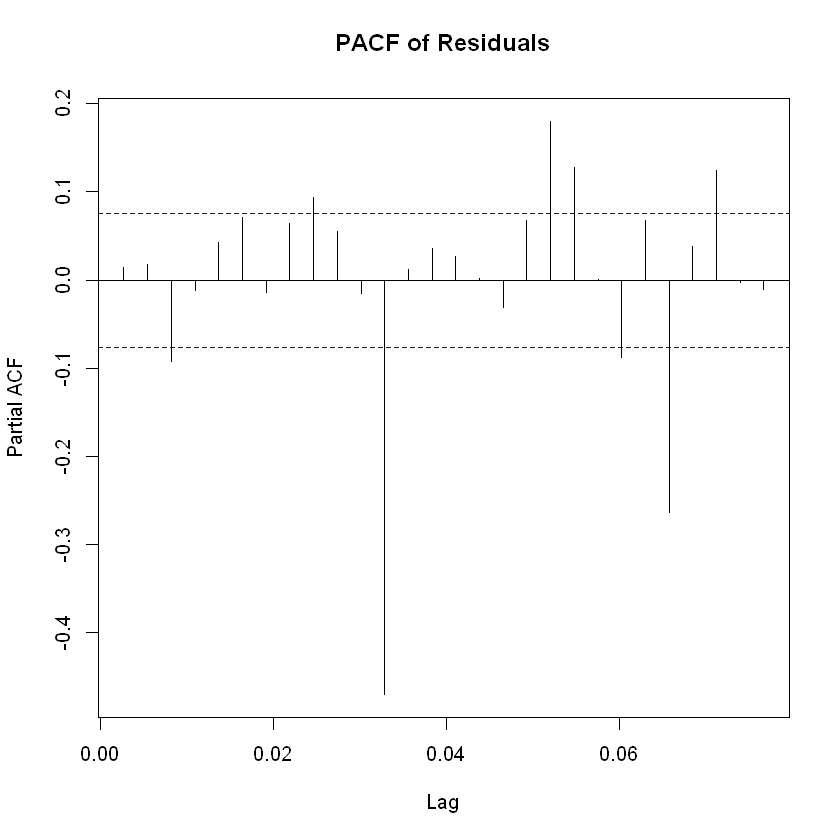

In [13]:
residuals <- residuals(arima_model_deseasonalized)

# Plot the residuals
plot(residuals, main="Residuals of ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


In [14]:
# Fit an ARIMA model to the deseasonalized data
# The order will be based on prior analysis (ACF, PACF), but here is an example:
arima_model_deseasonalized <- arima(deseasonalized_day_ts, order=c(5,0,1))
summary(arima_model_deseasonalized)


Call:
arima(x = deseasonalized_day_ts, order = c(5, 0, 1))

Coefficients:
         ar1      ar2      ar3     ar4     ar5     ma1  intercept
      0.9751  -0.2556  -0.0248  0.0528  0.0421  0.0465     4.2492
s.e.  0.6500   0.6672   0.2045  0.0562  0.0721  0.6497   108.4851

sigma^2 estimated as 319042:  log likelihood = -5150.25,  aic = 10316.51

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.2560636 564.8379 376.0073 92.45491 225.9221 0.9038758
                    ACF1
Training set 0.001081062

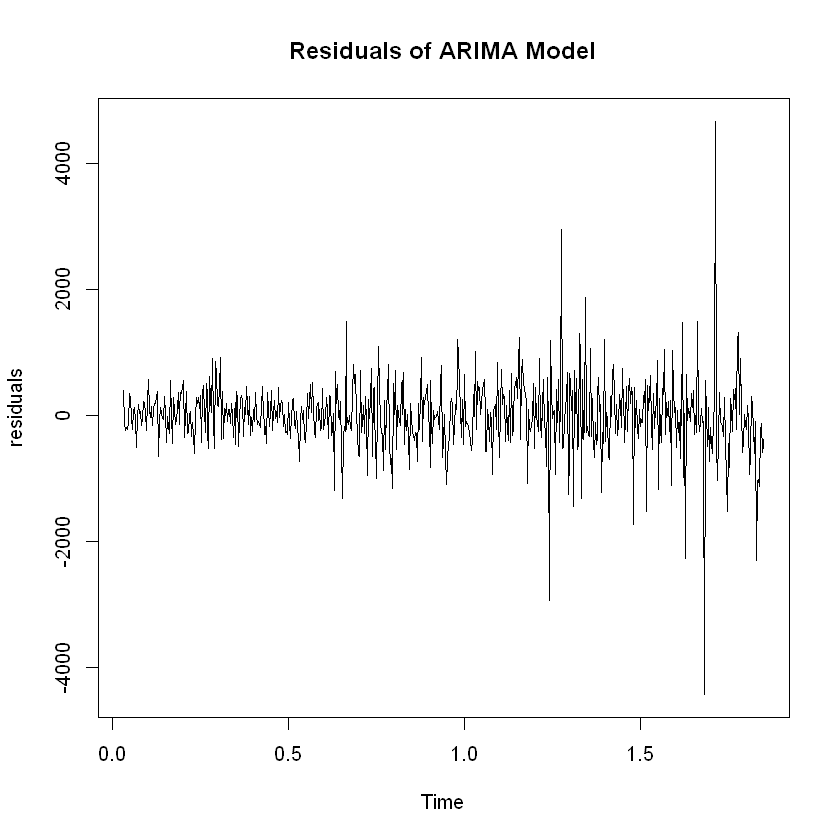

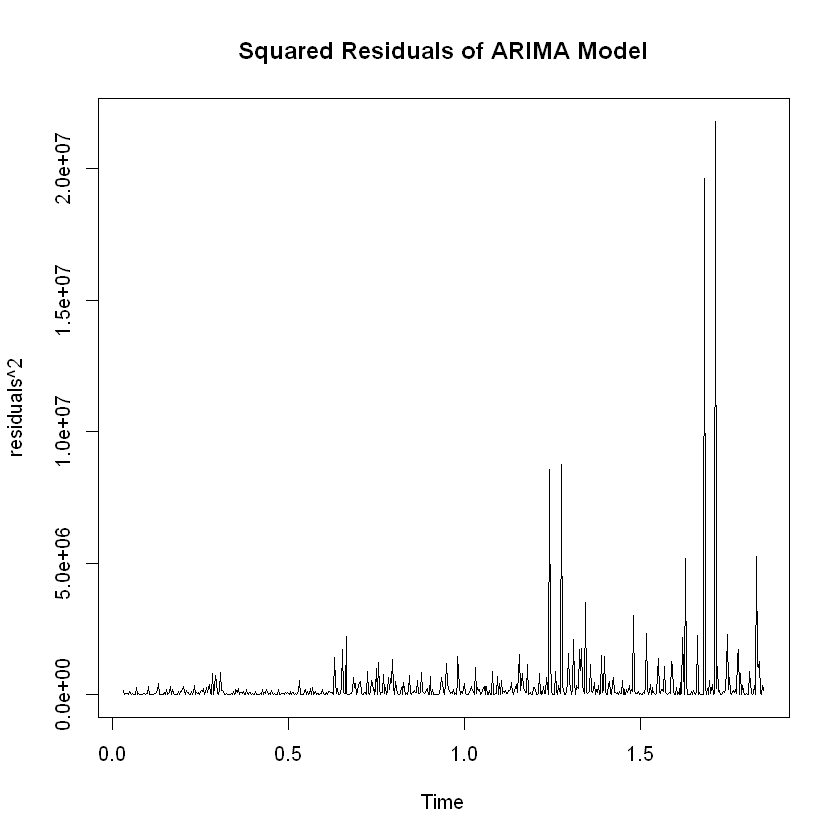

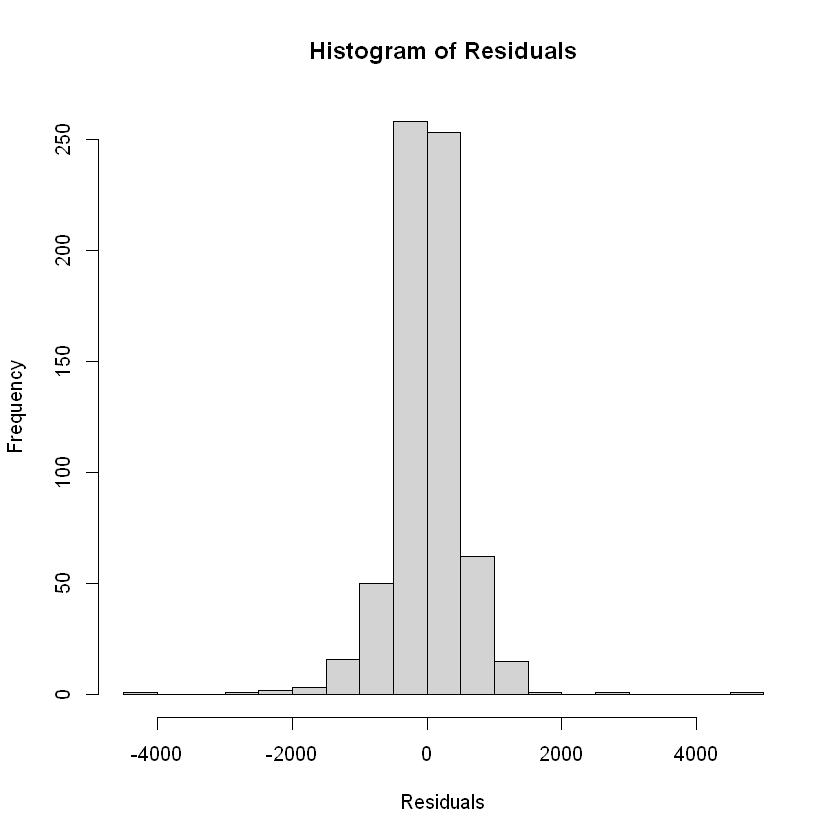

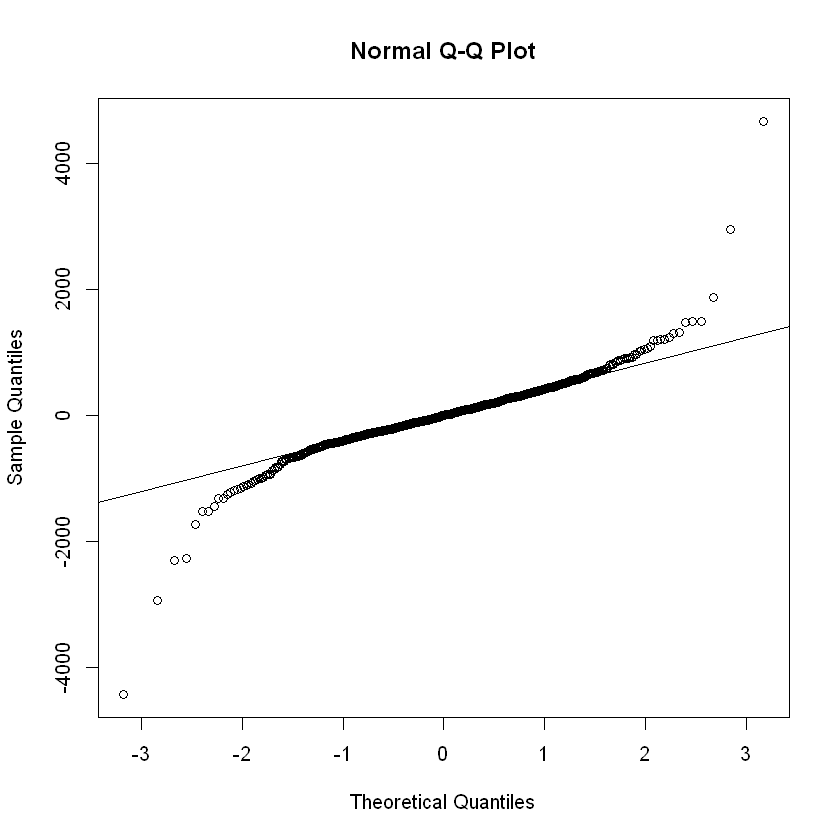

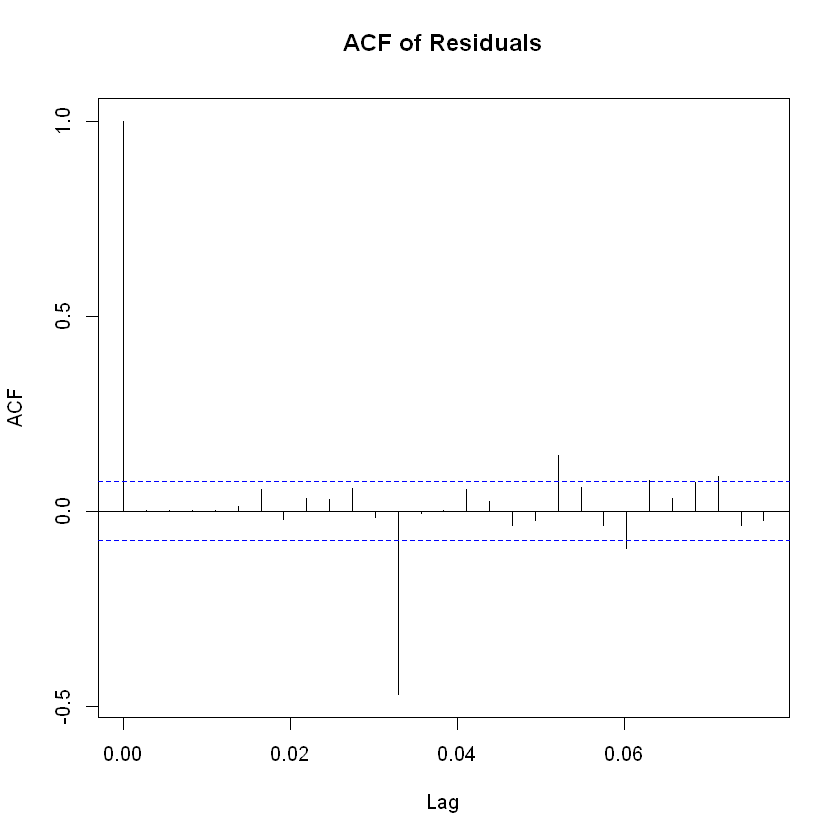


	Box-Ljung test

data:  residuals
X-squared = 2.2284, df = 6.4983, p-value = 0.9251


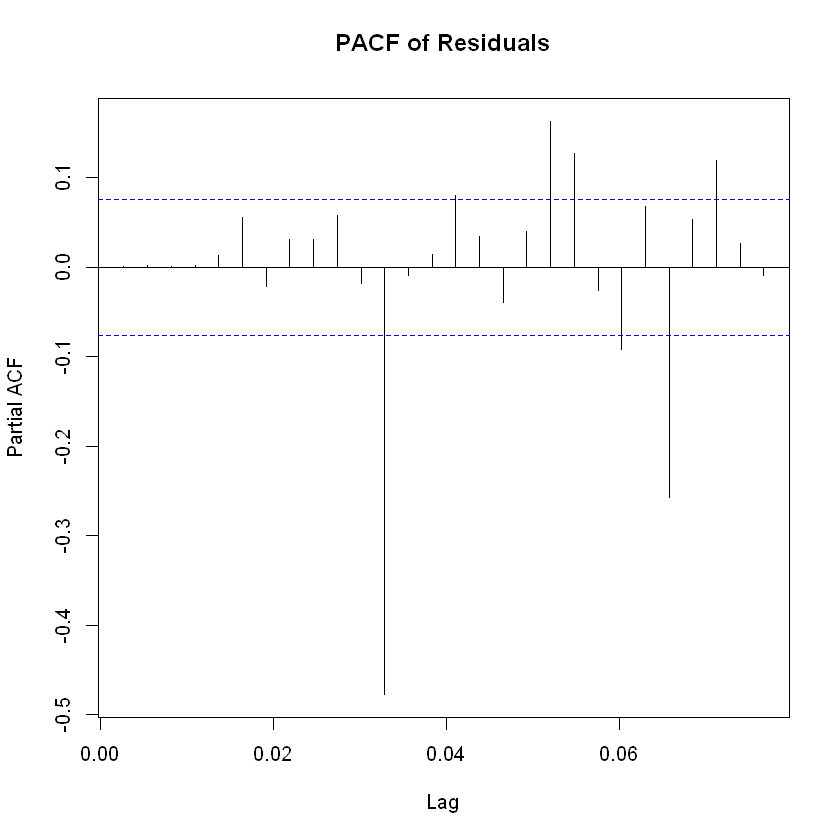

In [15]:
residuals <- residuals(arima_model_deseasonalized)

# Plot the residuals
plot(residuals, main="Residuals of ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


In [16]:
# Fit an ARIMA model to the deseasonalized data
# The order will be based on prior analysis (ACF, PACF), but here is an example:
arima_model_deseasonalized <- arima(deseasonalized_day_ts, order=c(6,1,2))
summary(arima_model_deseasonalized)


Call:
arima(x = deseasonalized_day_ts, order = c(6, 1, 2))

Coefficients:
         ar1     ar2      ar3     ar4     ar5      ar6     ma1      ma2
      0.0589  0.6678  -0.3034  0.0271  0.1266  -0.0119  0.0116  -0.9884
s.e.  0.0397  0.0395   0.0465  0.0465  0.0393   0.0396  0.0105   0.0104

sigma^2 estimated as 306013:  log likelihood = -5130.87,  aic = 10279.75

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set -22.10535 552.7675 371.0359 137.1211 273.3359 0.8919252
                     ACF1
Training set -0.000917801

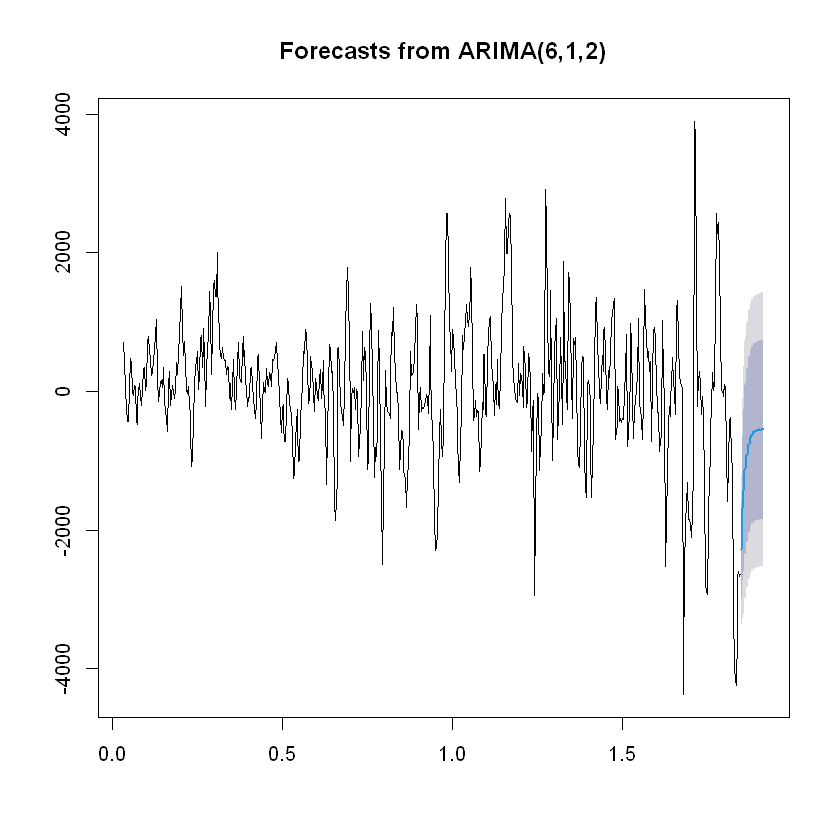

In [17]:
# Forecast future values
forecast_deseasonalized <- forecast(arima_model_deseasonalized, h=25) 
plot(forecast_deseasonalized)


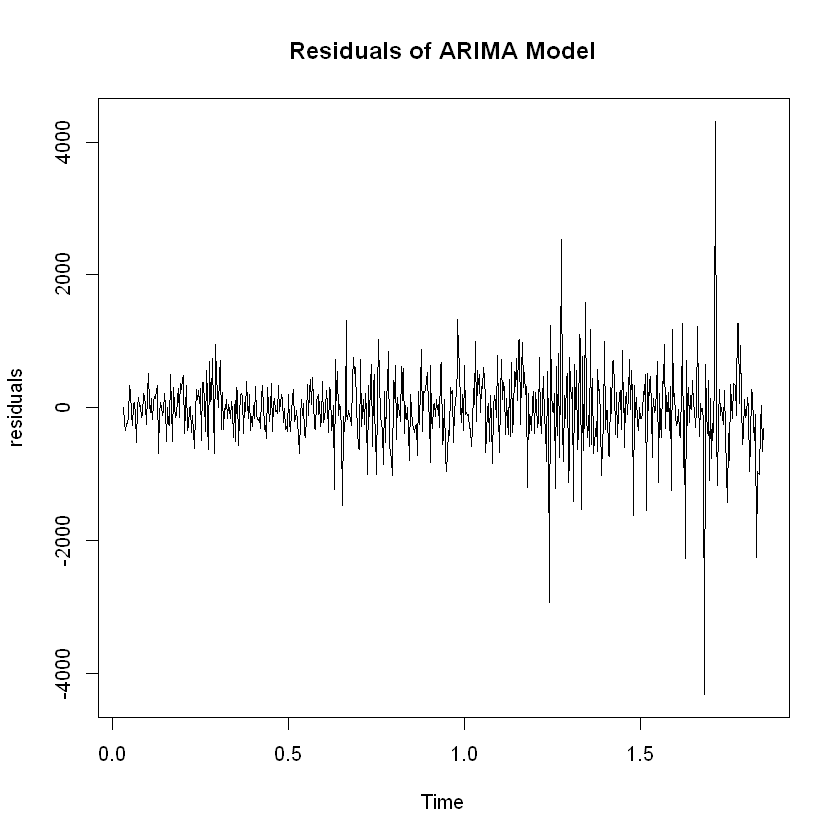

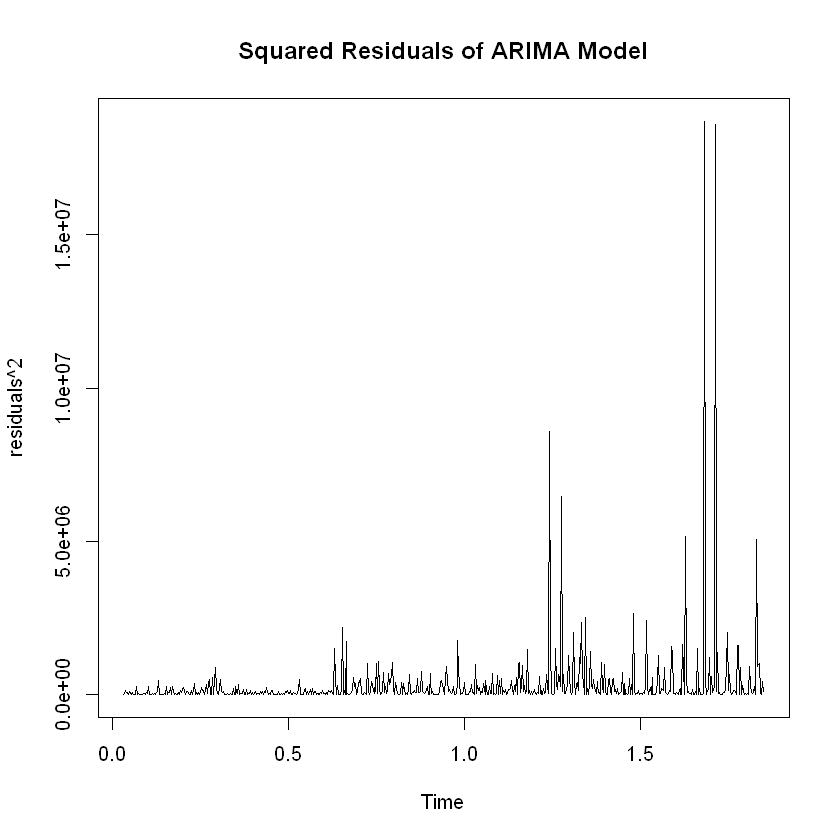

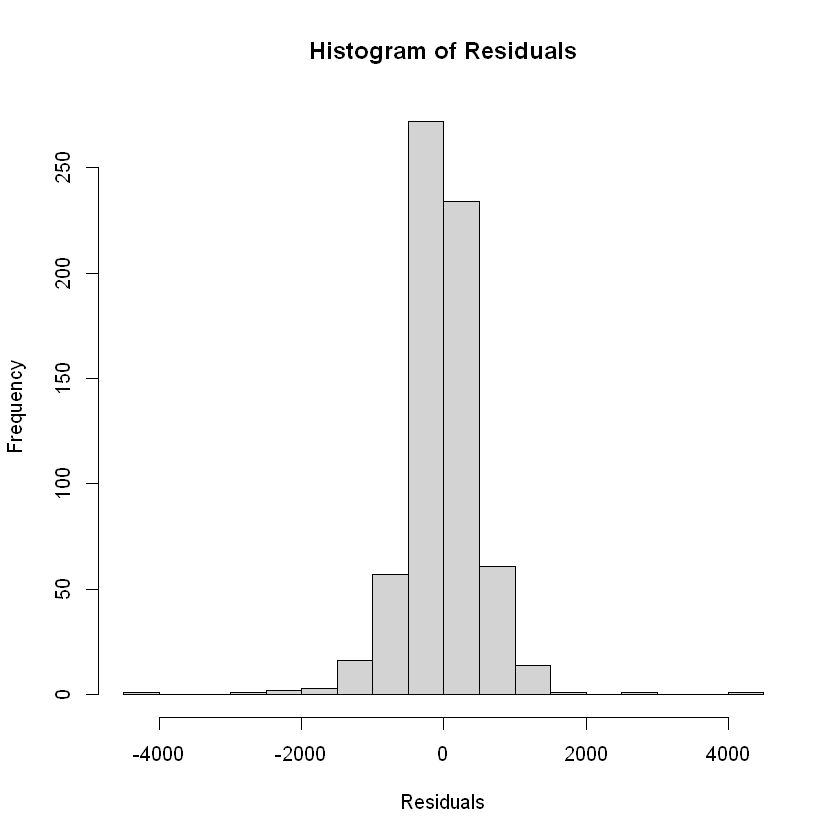

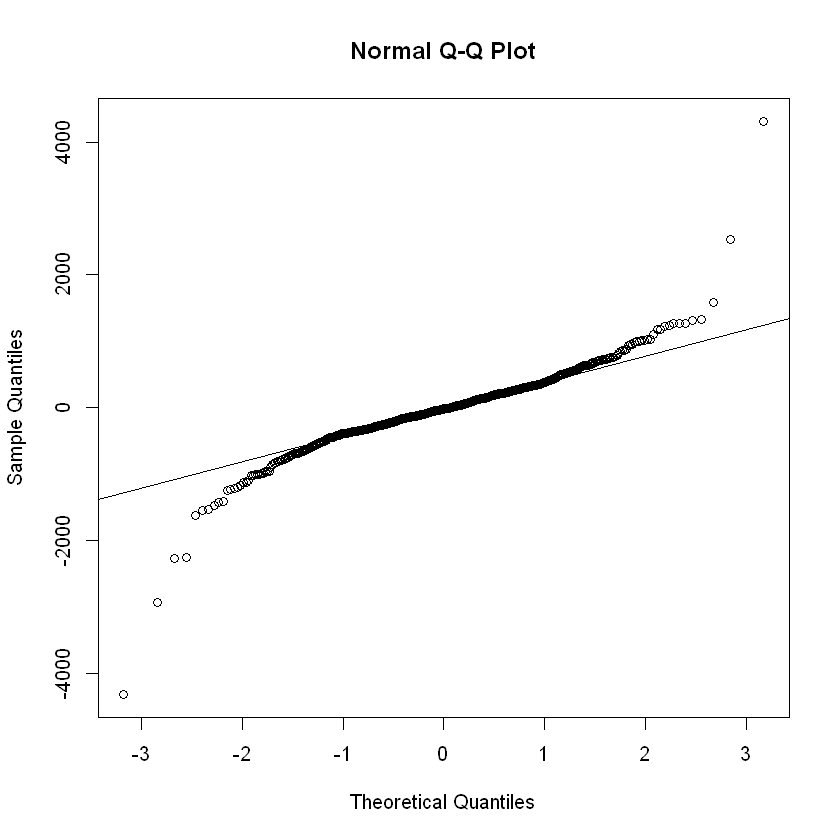

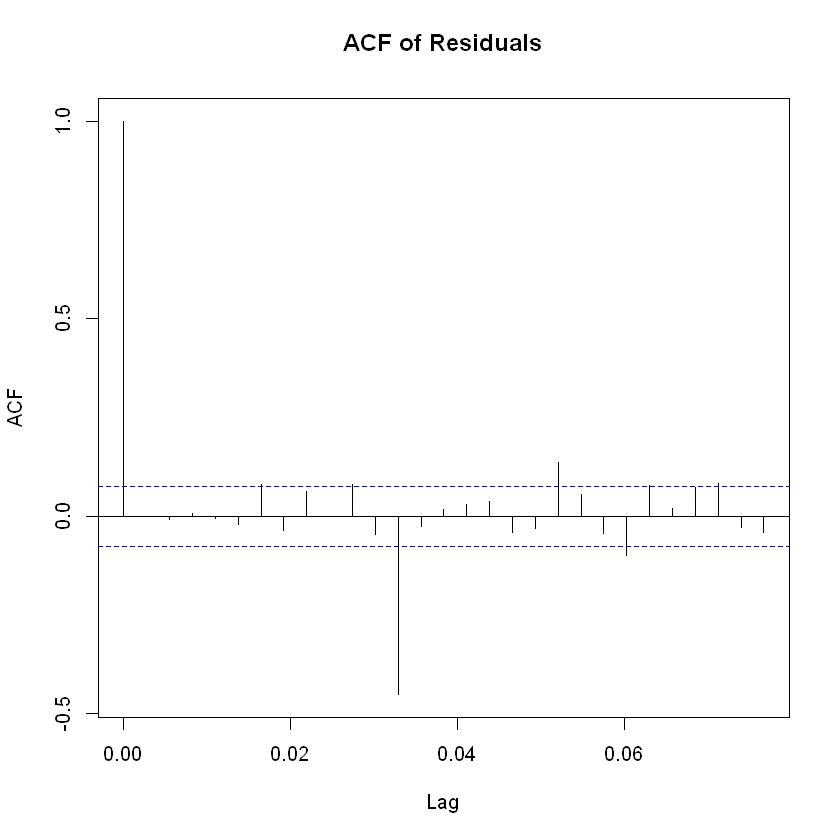


	Box-Ljung test

data:  residuals
X-squared = 4.6257, df = 6.4983, p-value = 0.6514


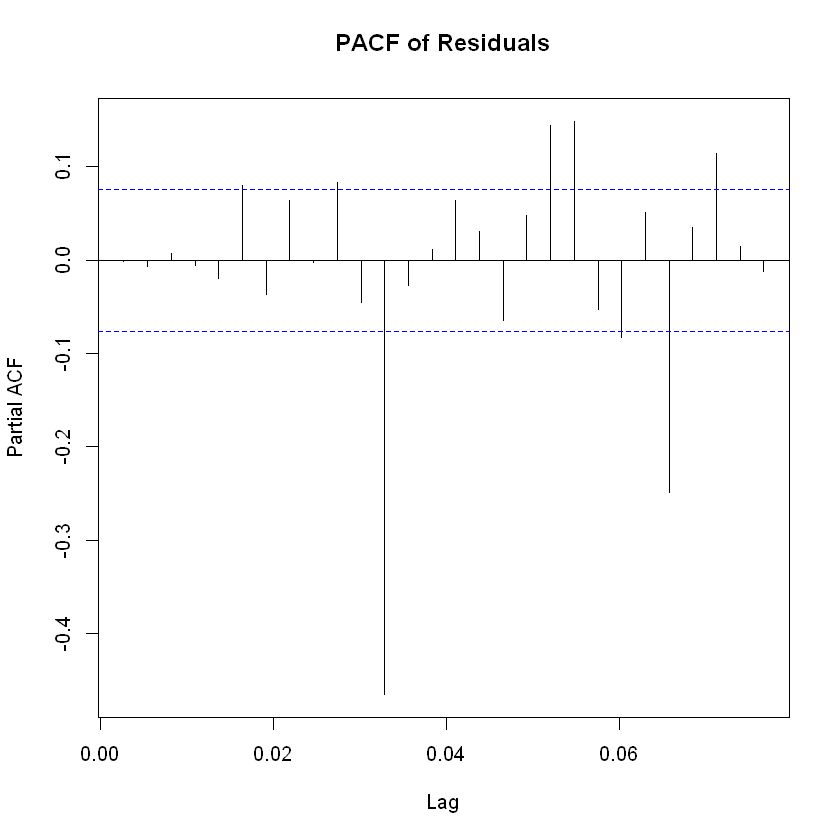

In [18]:
residuals <- residuals(arima_model_deseasonalized)

# Plot the residuals
plot(residuals, main="Residuals of ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


In [19]:
# Load the necessary library
library(forecast)


auto_fit <- auto.arima(deseasonalized_day_ts)

# Look at the summary of the fitted model
summary(auto_fit)


Series: deseasonalized_day_ts 
ARIMA(1,1,3) 

Coefficients:
         ar1      ma1      ma2      ma3
      0.5905  -0.5600  -0.2877  -0.1269
s.e.  0.0606   0.0683   0.0442   0.0578

sigma^2 = 324362:  log likelihood = -5146.34
AIC=10302.67   AICc=10302.76   BIC=10325.16

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set -22.30709 567.3796 377.9017 86.47882 225.6284 0.3748481
                     ACF1
Training set -0.002224026

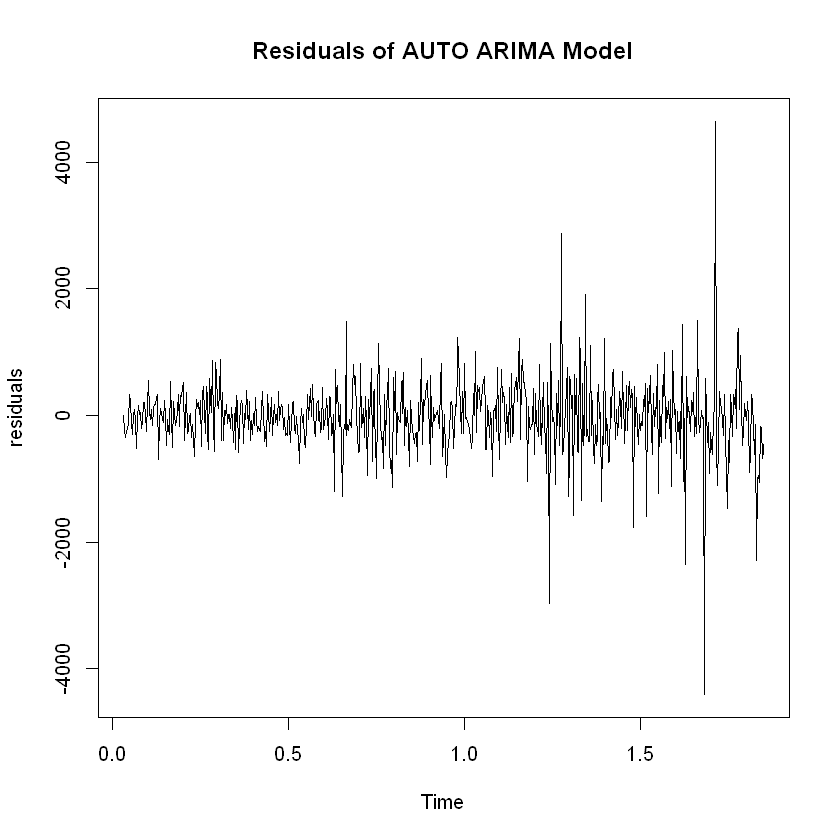

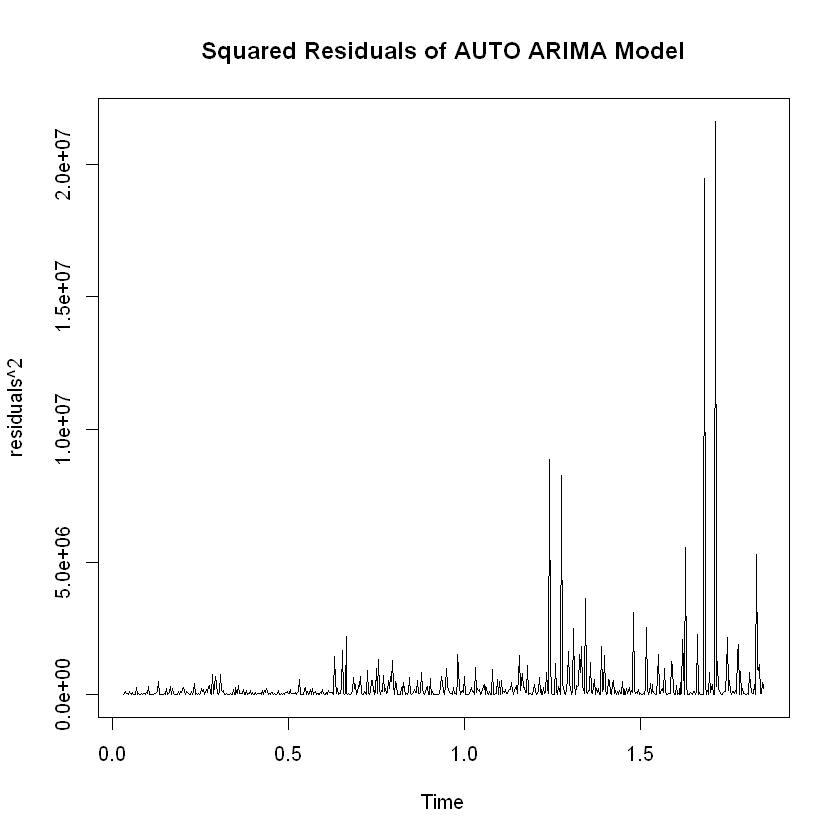

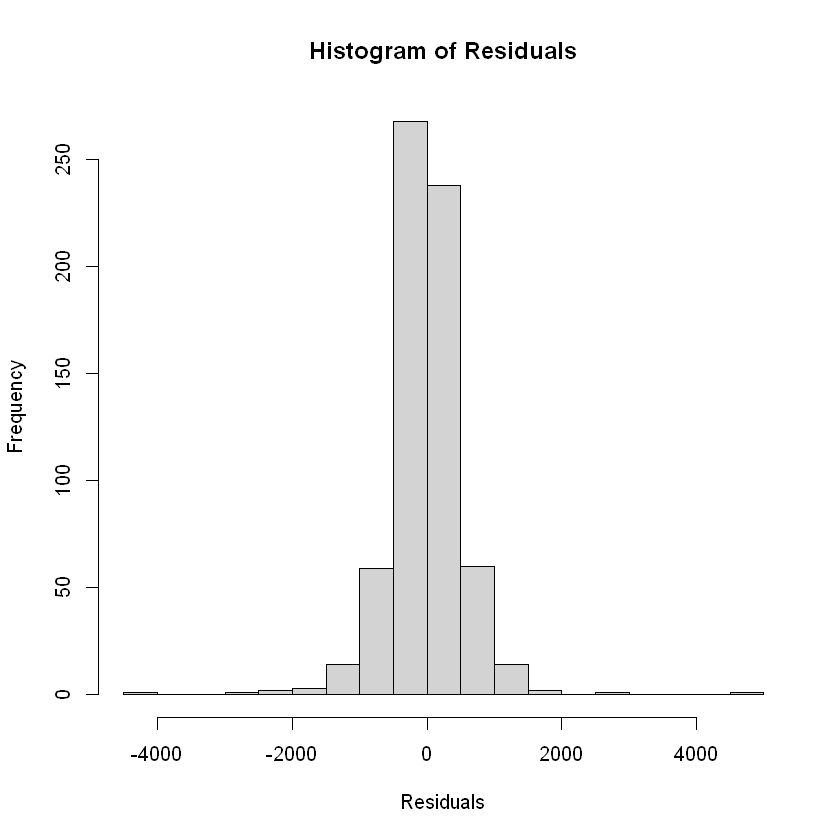

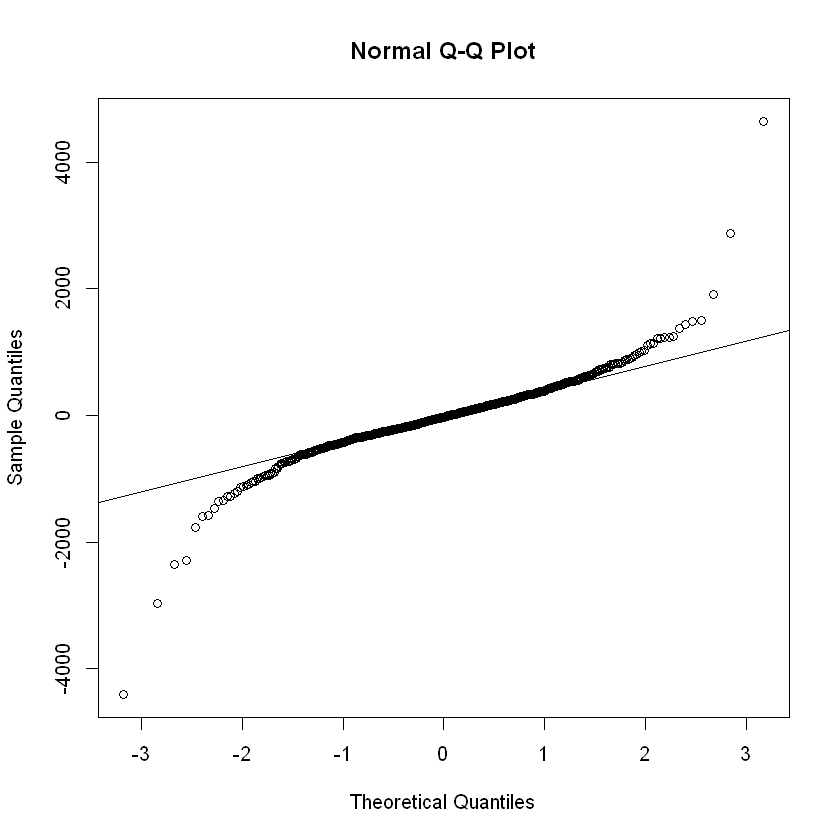

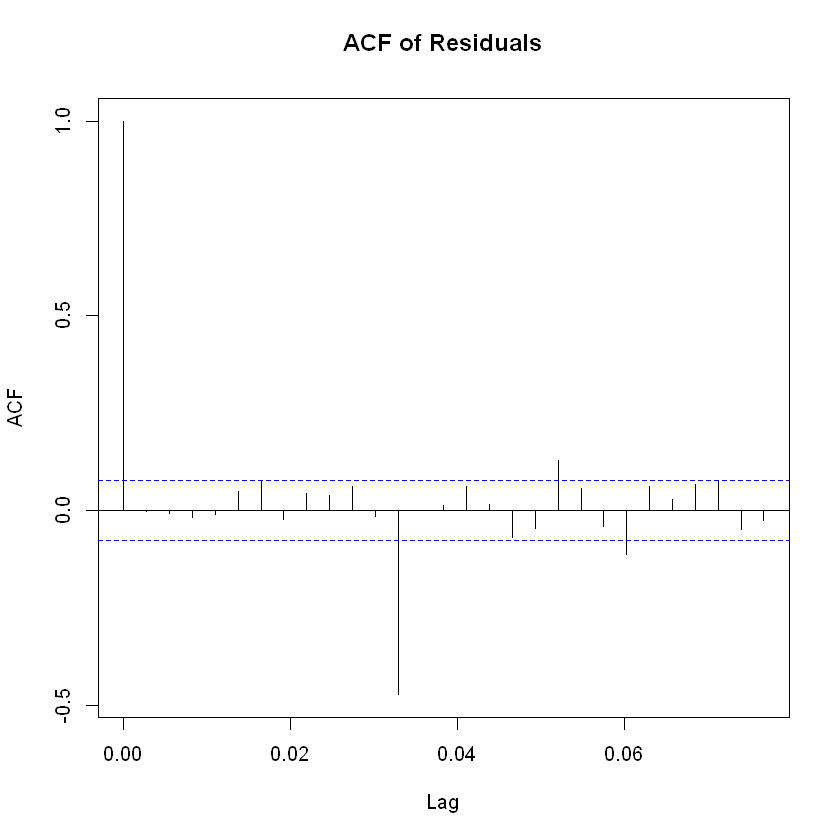


	Box-Ljung test

data:  residuals
X-squared = 5.6063, df = 6.4983, p-value = 0.5285


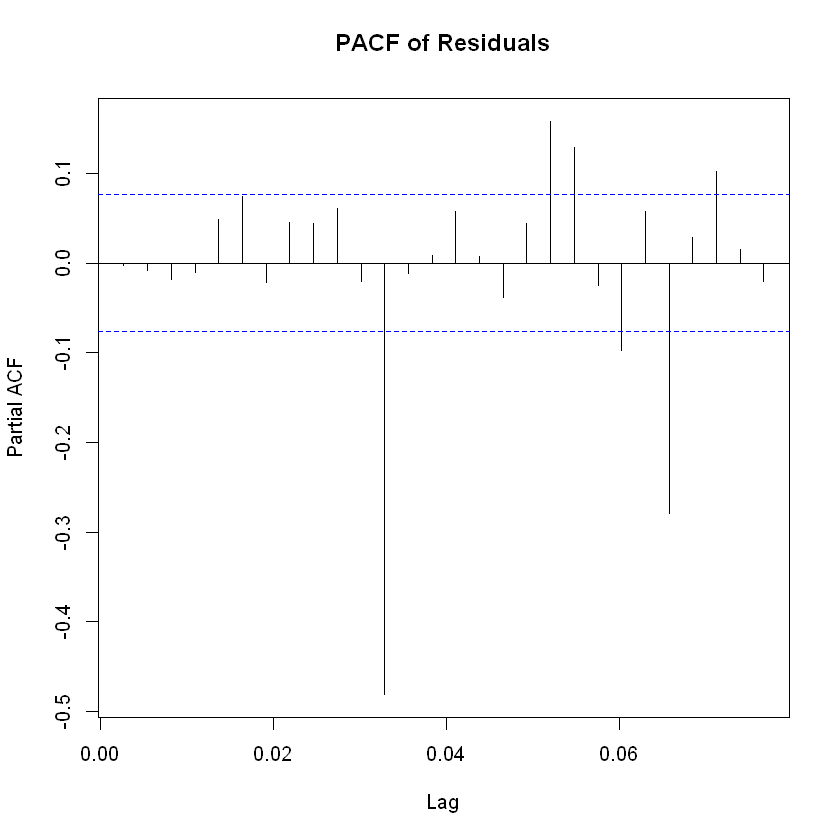

In [20]:
residuals <- residuals(auto_fit)

# Plot the residuals
plot(residuals, main="Residuals of AUTO ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of AUTO ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


Calculate forecast using the chosen model
plot both the original and the forecasted time series


In [21]:
# Load the necessary library
library(forecast)

chosen_model <- arima(deseasonalized_day_ts, order=c(1,1,3))

# Calculate forecast using the chosen model
forecasted_values <- forecast(chosen_model) 


In [23]:
deseasonalized_day_ts

A Time Series:
  [1]   705.265871   453.083959    33.986007  -250.125939  -426.363823
  [6]  -428.965531    62.467230   476.367221   398.634432    -1.463924
 [11]   -63.026205    89.385308    77.182130  -436.838918  -472.698883
 [16]  -164.257731    16.925690   117.034801   -78.821286  -204.498659
 [21]    32.325309   318.474587   354.098451    21.820767   122.363850
 [26]   707.270782   793.448495   574.074705   490.775619   458.252151
 [31]   233.980835   272.690354   442.835221   603.736660   803.374758
 [36]  1039.387614   204.741461  -141.486249   -24.200207   148.885628
 [41]   158.857091    58.685645   302.199844   350.913887  -150.203177
 [46]  -269.444767  -394.131124  -571.948606   108.331931   292.267415
 [51]  -201.529686   -51.856474    90.960264    -1.262733  -100.777656
 [56]    18.507077   426.298888   289.389586   246.869869   529.220021
 [61]   833.790195  1172.150564  1520.661498   877.833930   513.840291
 [66]   719.686944   409.249735    36.484948   -32.794891    72.130379
 [71]  -200.813971  -311.572292  -569.902905 -1079.136422  -964.506363
 [76]  -382.382666    61.358366   391.457763   410.689597   570.800553
 [81]    25.712063   245.335634   751.294841   806.548888   348.351824
 [86]   629.506584   914.167927   530.997198  -220.176334   265.473800
 [91]   677.923060   730.105854  1449.394503  1145.077654   251.838459
 [96]   822.437723  1527.474710  1602.986406  1370.484509  1375.467120
[101]  2009.916852  1391.283437  1312.933458   664.516937   533.617352
[106]   479.335121   642.388010   497.828908   454.098715   447.467237
[111]   247.302995   361.441748   347.022248   -65.375004  -130.147259
[116]   122.933226  -255.053064   103.907583   464.775813   -34.580145
[121]  -258.516249    12.031400   433.610448   704.799943   237.789382
[126]   151.568203   124.915227   595.177478   787.617207   499.674144
[131]   585.405225   164.189484    23.298646  -221.293545   -86.179281
[136]   -88.244298   314.446387   349.583458   102.303987   -98.671497
[141]  -253.318478  -385.283937  -138.533332   434.035987   481.505873
[146]   532.481632    69.939024  -245.664559  -674.932702  -204.133548
[151]   124.532059     6.729725   -15.342883   338.241625   110.067757
[156]    70.961647   278.817185   234.489906   242.652534    79.467697
[161]   467.750557   442.783974   479.601364   600.020118   702.458990
[166]   398.356853   251.453594   -89.773311  -359.773527  -590.547271
[171]  -249.868285  -190.057585  -493.304471  -727.855826  -723.263009
[176]  -268.933200   194.463409   119.284109  -197.802820  -217.915330
[181]  -367.943169  -625.914176 -1253.799359 -1186.483902  -709.652347
[186]  -462.473138  -259.767066  -564.828062 -1006.717119  -993.283977
[191]  -381.785100  -169.071323   113.571130   575.784713   552.783010
[196]   895.564318   842.909943   373.165510  -177.413412  -100.405747
[201]   206.196172   506.994262   380.786615   318.365583   -28.689865
[206]  -288.435178   188.384330    89.588167   -68.619827  -123.447649
[211]   187.276879   317.278287  -100.442019   110.395657   453.628989
[216]   147.491309  -236.155061  -247.956493 -1348.714418  -575.186761
[221]    14.154135   677.649165   619.793360   276.730915   286.399385
[226]  -271.532759 -1621.668833 -1866.065736 -1556.528374 -1257.519386
[231]   602.970215   637.430031   298.319878  -154.470397  -270.731070
[236]  -362.722811  -487.437364   -31.589282   911.340690  1422.203347
[241]  1791.269351  1408.604707   635.544769  -309.970400 -1015.455970
[246]   -85.397509    49.263442   -13.812165    64.300064  -254.287643
[251]    25.837008     3.798666  -942.441010  -721.121697  -497.924081
[256]     9.349454   864.972444   154.567876   256.731186   640.625680
[261]   552.519422    29.265252 -1120.723665  -968.436249   504.414920
[266]  1266.681007   996.628102   252.203299  -354.018206 -1236.257916
[271]  -811.380274  -935.603253  -560.803052   -20.138568   876.387348
[276]   378.300611  -722.485516 -1560.757157 -2489.785957 -1494.600713
[281]  -7

In [26]:
# Check the length of the time series
ts_length <- length(deseasonalized_day_ts)
cat("The length of the time series is:", ts_length, "\n")

# Suggest a new split point if the current one is invalid
if (split_point >= ts_length) {
    split_point <- ts_length * 0.8 # for example, use 80% of the length for training
    cat("The split_point was too high. Suggesting a new split_point at 80% of the series length:", split_point, "\n")
}

# Now attempt to split the series with the new split point
split_time <- time_index[split_point]
training_set <- window(deseasonalized_day_ts, end=split_time)
test_set <- window(deseasonalized_day_ts, start=split_time + 1/(frequency(deseasonalized_day_ts)))

# Output the new start and end points to check if they are correct
cat("Training set starts at:", start(training_set), "\n")
cat("Training set ends at:", end(training_set), "\n")
cat("Test set starts at:", start(test_set), "\n")
cat("Test set ends at:", end(test_set), "\n")


The length of the time series is: 664 
Training set starts at: 0 13 
Training set ends at: 1 178 
Test set starts at: 1 179 
Test set ends at: 1 311 


In [27]:
# Load the necessary library
library(forecast)

# Fit a manual ARIMA model (example: ARIMA(4,0,3))
manual_model <- arima(training_set, order=c(6,1,2))

# Fit an ARIMA model automatically
auto_model <- auto.arima(training_set)


In [28]:
# Load the necessary library
library(forecast)

# Fit a manual ARIMA model (example: ARIMA(4,0,3))
manual_model <- arima(training_set, order=c(4,0,3))

# Fit an ARIMA model automatically
auto_model <- auto.arima(training_set)


In [29]:
# Forecast the next 25 observations with the manual model
manual_forecast <- forecast(manual_model, h=25)

# Forecast the next 25 observations with the auto model
auto_forecast <- forecast(auto_model, h=25)


Warning message in window.default(x, ...):
"'end' value not changed"


ERROR: Error in window.default(x, ...): 'start' cannot be after 'end'


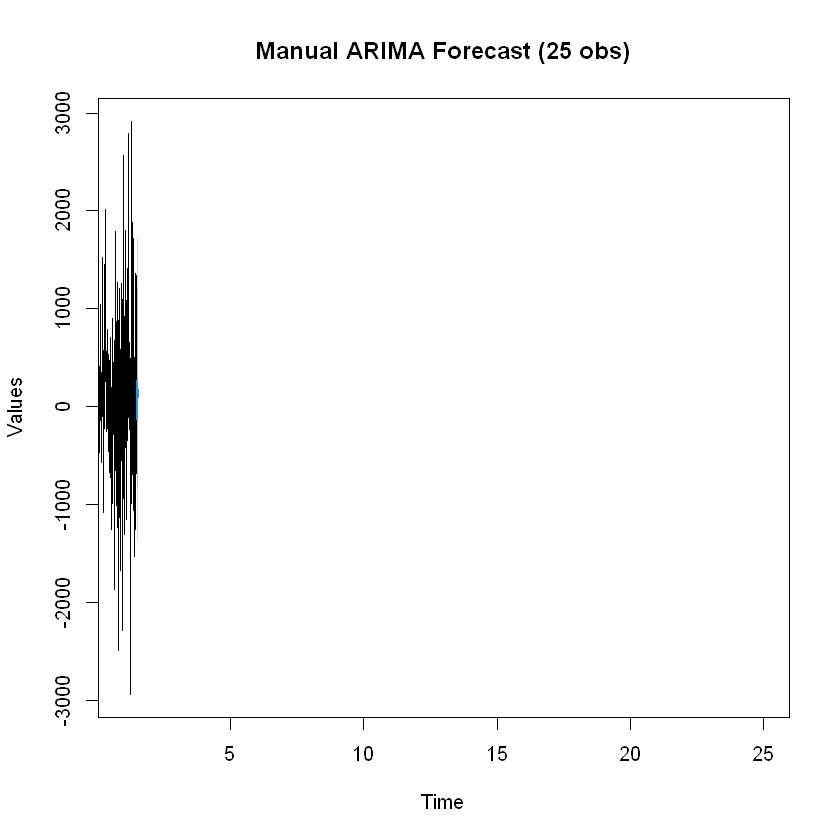

In [30]:

# Find the time range for the last 25 observations of the training set plus the 25 forecasted points
time_range <- time(training_set)[(length(training_set) - 24):length(training_set)]
time_range <- c(time_range, time_range[length(time_range)] + 1:25 / frequency(training_set))

# Plot the manual forecast for the 25 forecasted points
plot(manual_forecast, main="Manual ARIMA Forecast (25 obs)", xlim=c(1, 25), xlab="Time", ylab="Values")
lines(window(test_set, start=length(training_set) + 1, end=length(training_set) + 25), col='blue', lwd=2)

# Plot the automatic forecast for the 25 forecasted points
plot(auto_forecast, main="Auto ARIMA Forecast (25 obs)", xlim=c(1, 25), xlab="Time", ylab="Values")
lines(window(test_set, start=length(training_set) + 1, end=length(training_set) + 25), col='red', lwd=2)



In [32]:
# On fait 25 observations
end_test_set <- 25

# Now run the forecast with the defined horizon
manual_forecast <- forecast(chosen_model, h=end_test_set)


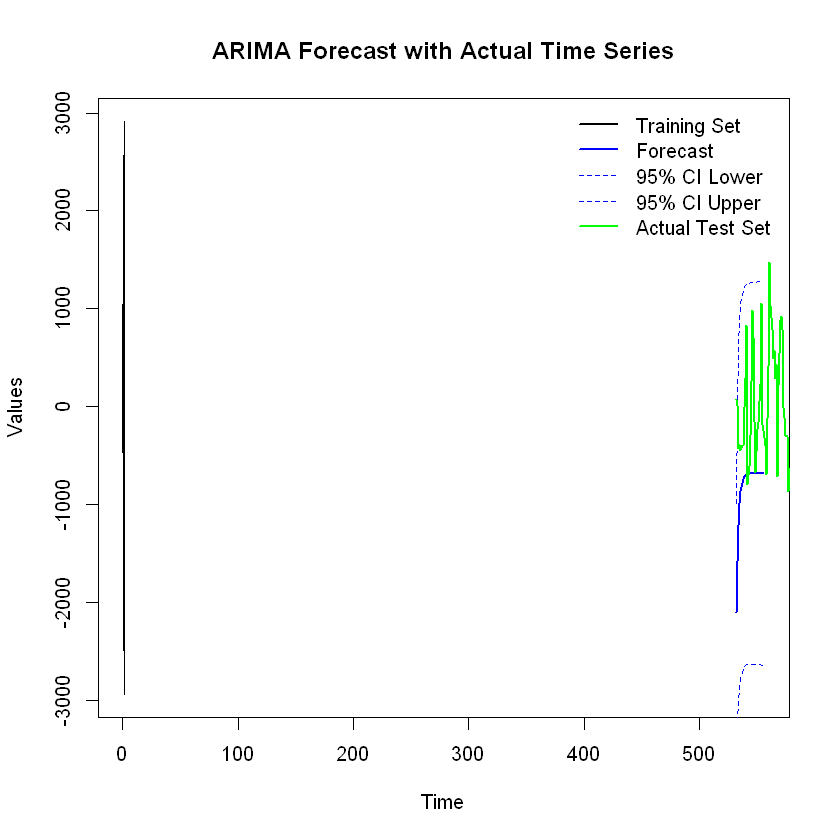

In [33]:
chosen_model <- arima(deseasonalized_day_ts, order=c(1,1,3))


# Generate forecasts from the chosen_model
manual_forecast <- forecast(chosen_model, h=end_test_set)

# The full time range should include both the training and test (forecast) sets
full_time_range <- 1:(length(training_set) + end_test_set)

# Plot the entire training set
plot(training_set, type = "l", xlim = c(1, length(full_time_range)), 
     xlab = "Time", ylab = "Values", main = "ARIMA Forecast with Actual Time Series", col="black")

# Add the forecasted values to the plot
# We start the forecast immediately after the end of the training set
forecast_start <- length(training_set) + 1
forecast_end <- forecast_start + end_test_set - 1

# Create a sequence for the forecast time points
forecast_time_points <- forecast_start:forecast_end

# Overlay the forecasted values
lines(forecast_time_points, manual_forecast$mean, col="blue", lwd=2)

# Overlay the forecasted upper and lower confidence intervals
lines(forecast_time_points, manual_forecast$lower[,2], col="blue", lwd=1, lty=2)
lines(forecast_time_points, manual_forecast$upper[,2], col="blue", lwd=1, lty=2)

# If you have actual test set values and want to overlay them
if (exists("test_set")) {
    lines(c(rep(NA, length(training_set)), test_set), col = "green", lwd=2)
}

# Add a legend to the plot to differentiate the lines
legend("topright", legend=c("Training Set", "Forecast", "95% CI Lower", "95% CI Upper", "Actual Test Set"),
       col=c("black", "blue", "blue", "blue", "green"), lty=c(1, 1, 2, 2, 1), lwd=c(2, 2, 1, 1, 2), bty="n")


Le forecast est tres mauvais.